In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../../')
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer
)
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score,
    fbeta_score,
    recall_score,
    precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import itertools
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
def get_base_predictions(dev_df, test_df):
    default_prediction = int(dev_df['current_state'].mode()[0])
    base_predictions = []
    prev_gvkey = None
    
    for index, row in test_df.iterrows():
        gvkey = row['GVKEY']
        if prev_gvkey == gvkey:
            base_predictions.append(row['current_state'])
        else:
            base_predictions.append(default_prediction)
            prev_gvkey = gvkey 

    return base_predictions
      
def get_random_predictions(df, test_df):
    value_series = df['is_investment_grade'].value_counts()/df.shape[0]
    value_dict = value_series.to_dict()
    
    values_list = []
    probability_list = []
    for value, probability in value_dict.items():
        values_list.append(value)
        probability_list.append(probability)
    
    return np.random.choice(values_list, size=test_df.shape[0], p=probability_list)

In [3]:
original_features_df = pd.read_csv("../../../../../data/credit_rating/intermediate_data/annual_credit_rating_features.csv")
del original_features_df["Unnamed: 0"]

In [4]:
dt_model = DecisionTreeClassifier()

In [5]:
trainer = RatingModelTrainer(original_features_df, dt_model, 'windsorized_ranking', 'whole')

In [6]:
trainer.make_dev_and_test_df(threshold_year=2005)

In [7]:
base_predictions = get_base_predictions(trainer.dev_df, trainer.test_df)

,Precision,Recall,F1 Score
micro,0.6436,0.6436,0.6436
macro,0.7354,0.6477,0.6792
weighted,0.7096,0.6436,0.6616


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.86      0.79      0.82        62
        2.0       0.85      0.76      0.80       103
        3.0       0.86      0.72      0.79       145
        4.0       0.87      0.76      0.81       284
        5.0       0.86      0.77      0.81       523
        6.0       0.82      0.70      0.75       574
        7.0       0.81      0.68      0.74       875
        8.0       0.83      0.70      0.76      1225
        9.0       0.79      0.68      0.73       934
       10.0       0.73      0.59      0.65       682
       11.0       0.72      0.58      0.64       942
       12.0       0.68      0.57      0.62      1096
       13.0       0.30      0.75      0.43       973
       14.0       0.66      0.53      0.59       819
       15.0       0.56      0.42      0.48       389
       16.0       0.58      0.35      0.44       192

avg / total       0.71      0.64      0.66      9818

Confusion M

../../../../helpers/rating_model_helpers.py:172: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif any(direction in true_classes for direction in change_directions):
../../../../helpers/rating_model_helpers.py:179: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(any(direction in true_classes for direction in change_directions), classes)


Confusion matrix, without normalization


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,49,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0
2,5,78,4,0,0,0,0,0,0,0,0,0,16,0,0,0
3,3,10,105,11,1,0,0,0,0,0,0,0,15,0,0,0
4,0,2,12,215,18,0,0,0,0,0,0,0,37,0,0,0
5,0,1,1,18,403,25,1,0,0,0,0,1,73,0,0,0
6,0,0,0,0,31,400,62,5,0,0,0,0,76,0,0,0
7,0,0,0,3,8,44,599,91,6,0,0,2,122,0,0,0
8,0,0,0,0,5,16,67,862,108,7,2,0,158,0,0,0
9,0,0,0,0,0,4,10,64,633,75,13,0,135,0,0,0
10,0,0,0,0,0,1,0,17,23,404,117,14,106,0,0,0


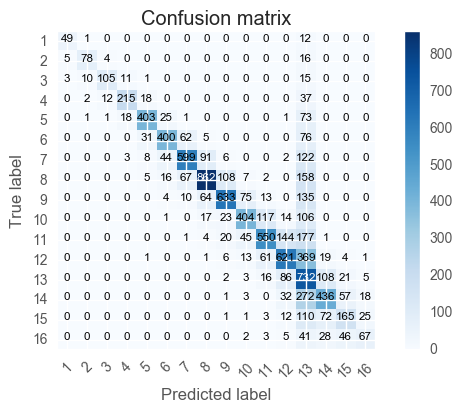

In [8]:
trainer.display_results(trainer.y_test, base_predictions)

In [9]:
trainer.y_predicted = base_predictions

In [10]:
trainer._make_delta_df()

/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
trainer.y_test_delta.shape

(3562,)

,Precision,Recall,F1 Score
micro,0.0177,0.0177,0.0177
macro,0.0022,0.0130,0.0038
weighted,0.0030,0.0177,0.0052


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        13
        2.0       0.00      0.00      0.00        25
        3.0       0.00      0.00      0.00        40
        4.0       0.00      0.00      0.00        69
        5.0       0.00      0.00      0.00       120
        6.0       0.00      0.00      0.00       174
        7.0       0.00      0.00      0.00       276
        8.0       0.00      0.00      0.00       363
        9.0       0.00      0.00      0.00       301
       10.0       0.00      0.00      0.00       278
       11.0       0.00      0.00      0.00       392
       12.0       0.00      0.00      0.00       475
       13.0       0.04      0.21      0.06       304
       14.0       0.00      0.00      0.00       383
       15.0       0.00      0.00      0.00       224
       16.0       0.00      0.00      0.00       125

avg / total       0.00      0.02      0.01      3562

Confusion M

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0
2,5,0,4,0,0,0,0,0,0,0,0,0,16,0,0,0
3,3,10,0,11,1,0,0,0,0,0,0,0,15,0,0,0
4,0,2,12,0,18,0,0,0,0,0,0,0,37,0,0,0
5,0,1,1,18,0,25,1,0,0,0,0,1,73,0,0,0
6,0,0,0,0,31,0,62,5,0,0,0,0,76,0,0,0
7,0,0,0,3,8,44,0,91,6,0,0,2,122,0,0,0
8,0,0,0,0,5,16,67,0,108,7,2,0,158,0,0,0
9,0,0,0,0,0,4,10,64,0,75,13,0,135,0,0,0
10,0,0,0,0,0,1,0,17,23,0,117,14,106,0,0,0


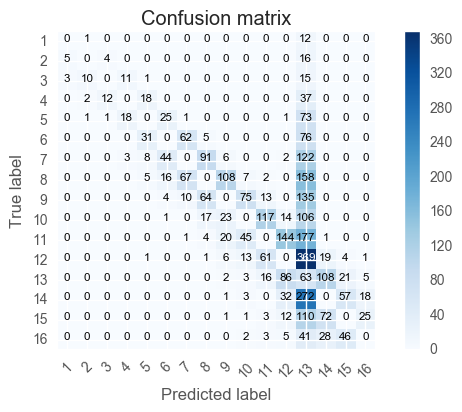

In [12]:
trainer.display_results(trainer.y_test_delta, trainer.y_predicted_delta)

In [13]:
def plot_hist_next_and_predicted(df, ranking_type):
        max_value = int(df['next_state'].max())

        if ranking_type == 'ranking':
            font_size = 8
        elif ranking_type == 'windsorized_ranking':
            font_size = 10
        elif ranking_type == 'broad_ranking':
            font_size = 12
        elif ranking_type == 'is_investment_grade':
            pass

        g = sns.FacetGrid(df, col='next_state', col_wrap=4, sharex=False)
        g.map(plt.hist, 'predicted_state', bins=range(1, max_value + 2, 1), color='c', align='left')
        g.set(xticks=range(1, max_value + 1, 1))

        if ranking_type != 'is_investment_grade':
            for ax in g.axes.flat:
                for label in ax.get_xticklabels():
                    label.set_fontsize(font_size)
                    label.set_rotation(90)

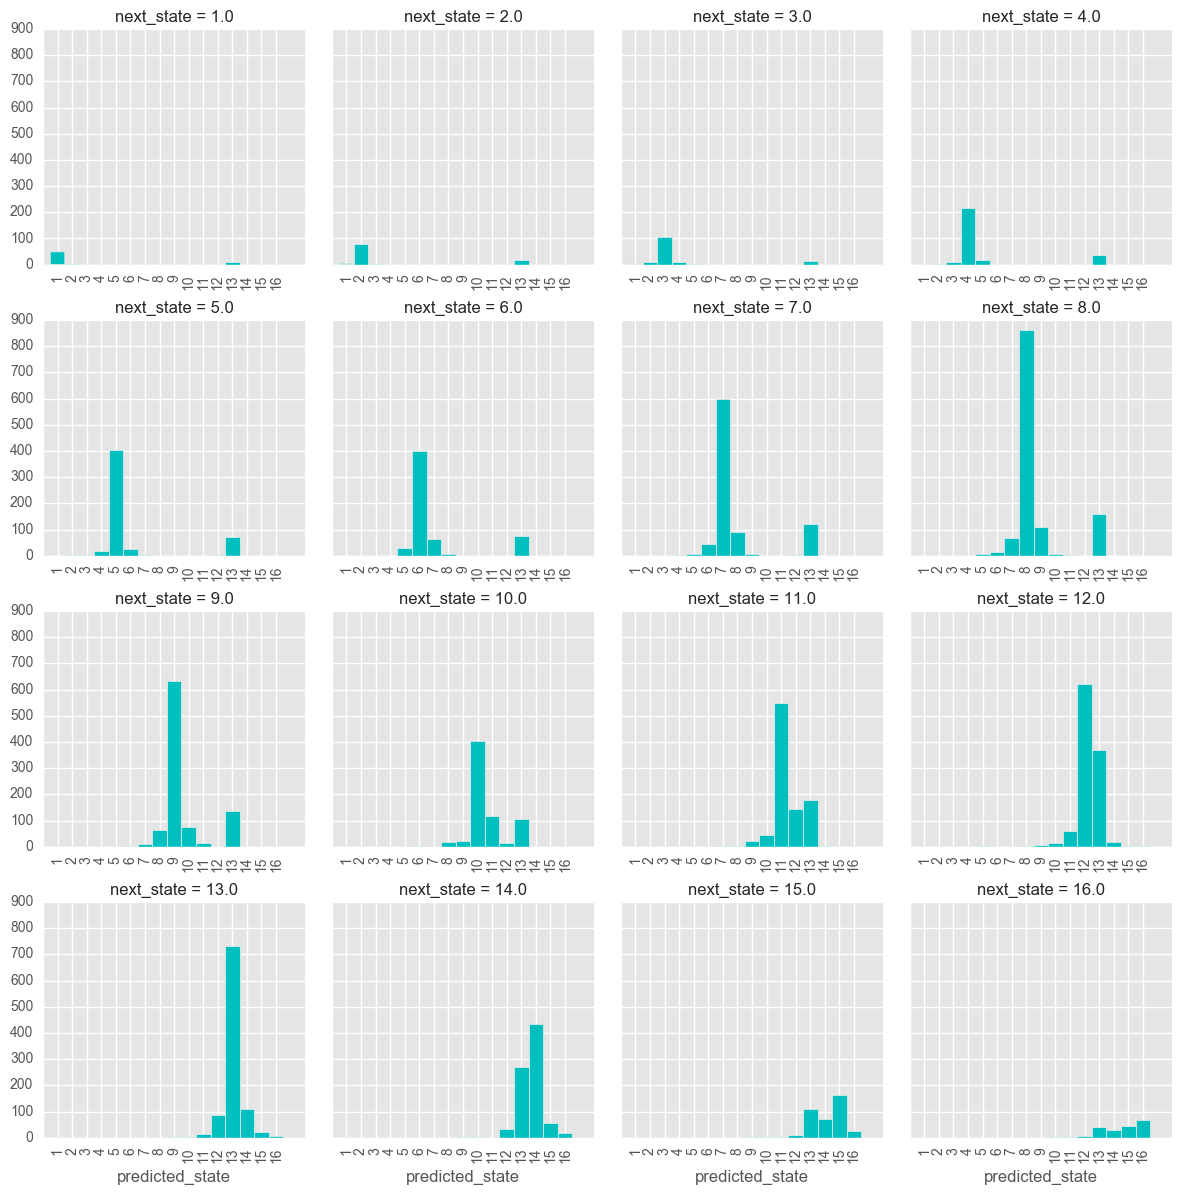

In [14]:
plot_hist_next_and_predicted(trainer.test_df, 'windsorized_ranking')

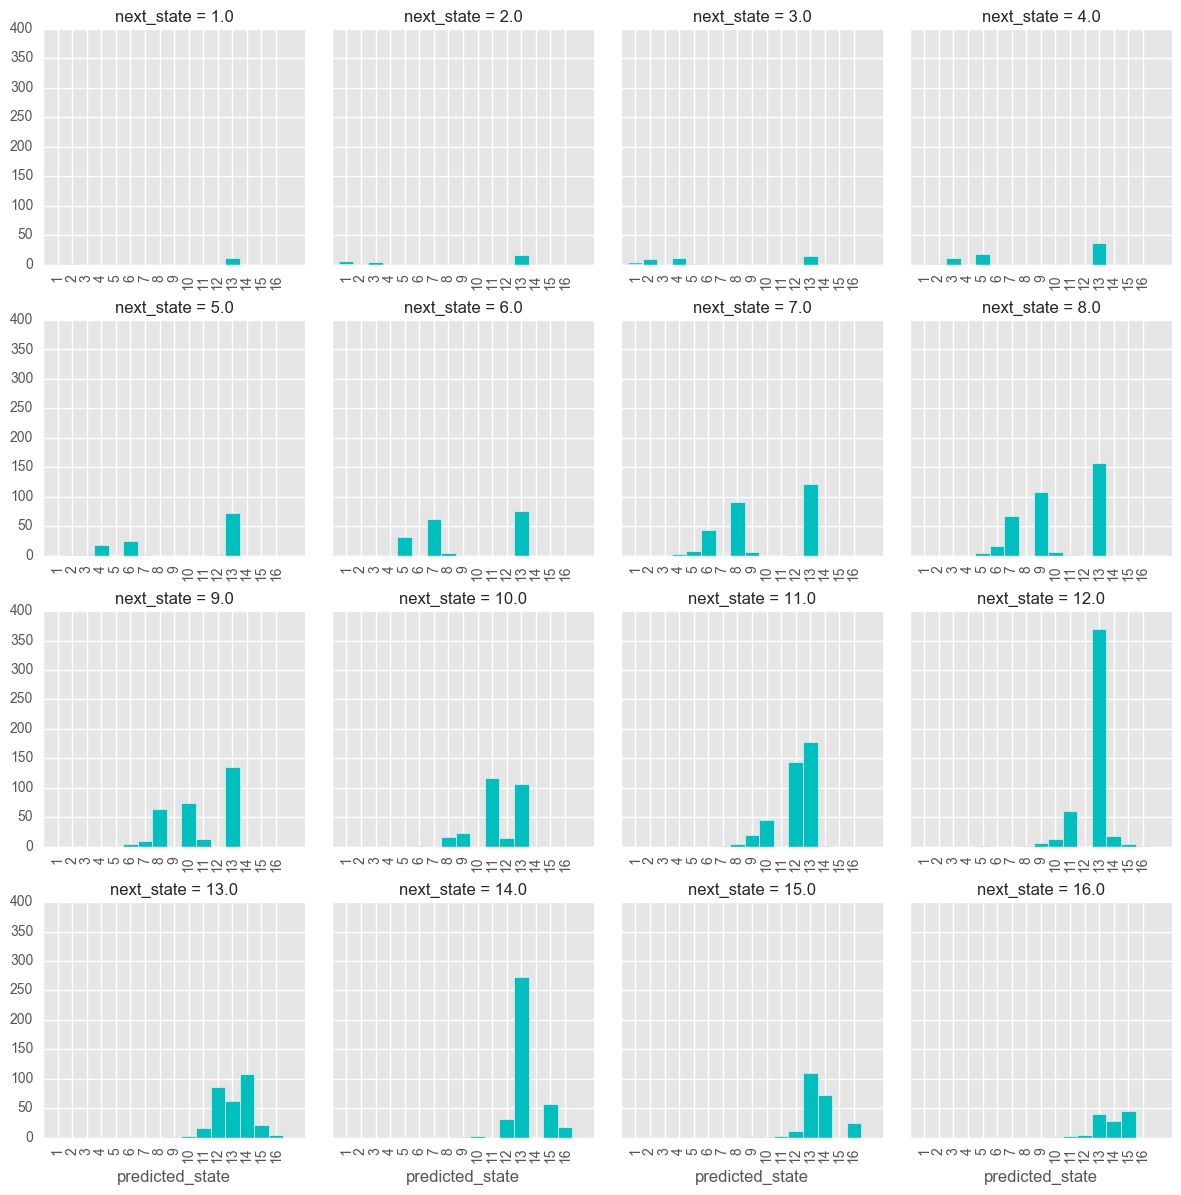

In [15]:
plot_hist_next_and_predicted(trainer.test_delta_df, 'windsorized_ranking')

,Precision,Recall,F1 Score
micro,0.6600,0.6600,0.6600
macro,0.3651,0.3462,0.3375
weighted,0.6044,0.6600,0.6230


Detailed classification report:
             precision    recall  f1-score   support

  downgrade       0.14      0.14      0.14      1150
       keep       0.75      0.85      0.80      7360
    upgrade       0.21      0.05      0.08      1308

avg / total       0.60      0.66      0.62      9818

Confusion Matrix:
HELLLO
(True, ['downgrade', 'keep', 'upgrade'])
Confusion matrix, without normalization


,downgrade,keep,upgrade
downgrade,164,968,18
keep,891,6256,213
upgrade,103,1145,60


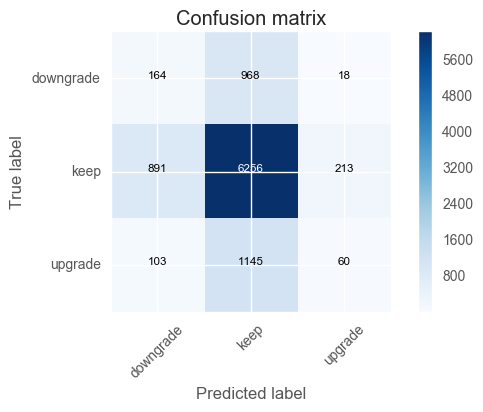

In [20]:
trainer.display_results(trainer.test_df['next_direction'].ravel(), trainer.test_df['predicted_direction'].ravel())

,Precision,Recall,F1 Score
micro,0.0629,0.0629,0.0629
macro,0.1159,0.0628,0.0724
weighted,0.1214,0.0629,0.0734


Detailed classification report:
             precision    recall  f1-score   support

  downgrade       0.14      0.14      0.14      1150
       keep       0.00      0.00      0.00      1104
    upgrade       0.21      0.05      0.08      1308

avg / total       0.12      0.06      0.07      3562

Confusion Matrix:
HELLLO
(True, ['downgrade', 'keep', 'upgrade'])
Confusion matrix, without normalization


,downgrade,keep,upgrade
downgrade,164,968,18
keep,891,0,213
upgrade,103,1145,60


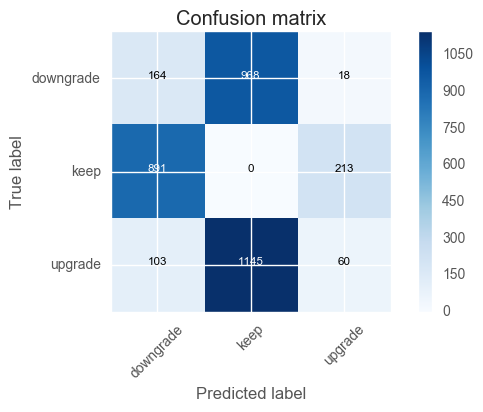

In [21]:
trainer.display_results(trainer.test_delta_df['next_direction'].ravel(), trainer.test_delta_df['predicted_direction'].ravel())